<a href="https://colab.research.google.com/github/drfperez/YoungPhotonicsCongress/blob/main/Rogueplanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Photonics evolved from classical optics to quantum and relativistic light, from Newton’s lenses to Einstein’s photoelectric effect and gravitational bending of light. This poster shows how cosmic-scale lenses—rogue planets—act as natural photonic components, extending optical principles to the universe.

Technical Commentary: Gravitational Microlensing and Photonics
1. The Gravitational Lens as a Photonic Component
In this simulation, a rogue planet acts as a natural gravitational lens. In classical photonics, a lens uses a refractive index gradient to bend light. Here, the planet's mass warps spacetime, creating a "lens" that redirects starlight toward the observer.
 * Magnification (A): The calcular_amplificacio function (Paczyński equation) describes the intensification of the optical flux. This is analogous to a high-gain optical amplifier where the gain depends on the spatial alignment (impact parameter u_0).
2. Space-Based Interferometry and Parallax
The code compares observations from Earth (KMTNet/OGLE) and the Gaia satellite.
 * Optical Path Difference: The retard_gaia variable (1.9 hours) represents the time delay caused by the different spatial positions of the two "detectors."
 * Parallax in Photonics: By using two observers separated by a large distance (Gaia is at the L2 point, 1.5 million km away), scientists create a cosmic-scale interferometer. Measuring the time offset between the two magnification peaks allows for the calculation of the planet's mass and distance, similar to how triangulation works in laser rangefinding.
3. Signal-to-Noise Ratio (SNR) and Detection
The addition of soroll_terra (Gaussian noise) simulates the real-world limitations of photodetectors.
 * Photon Counting: In rogue planet detection, the signal is often very brief (t_E = 0.842 days). Photonic sensors must have extremely high stability and low dark current to distinguish the magnification peak from background stellar flickering.
 * Time-Resolved Spectroscopy: The duration of the event (t_E) is the "pulse width" of the signal. A shorter pulse indicates a lower-mass object (like a planet), whereas a longer pulse would indicate a star.
4. Direct Photonic Links: The Einstein Radius
The "Einstein Time" (t_E) is related to the Einstein Radius, which defines the optical aperture of the gravitational lens. In the field of nanophotonics, researchers study "transformation optics" to mimic this gravitational bending of light using metamaterials, effectively creating "tabletop" black holes or lenses that follow the same mathematical principles as this code.
Summary for Rogue Planets
This code effectively demonstrates how we use the entire universe as an optical laboratory. By treating gravity as a photonic tool, we can detect dark, invisible planets that would otherwise be impossible to see.

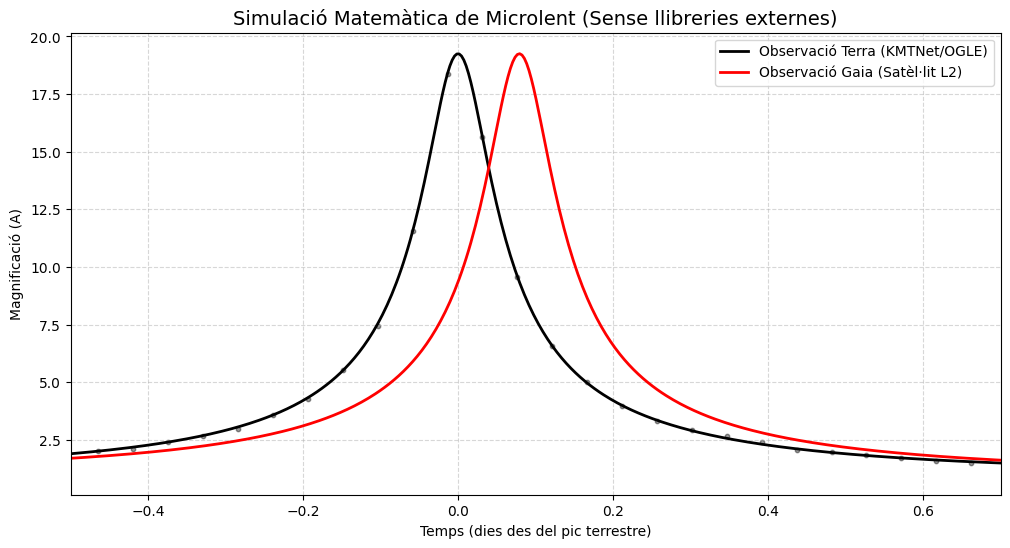

Magnificació màxima: 19.25x
L'escala de temps de 0.842 dies és el que indica que és un planeta de massa Saturn.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# 1. PARÀMETRES DE LA SIMULACIÓ (Extrets de l'article)
t_E = 0.842          # Temps d'Einstein (durada en dies)
u0 = 0.052           # Paràmetre d'impacte (més petit = més brillant)
t0_terra = 0.0       # Pic a la Terra
retard_gaia = 1.9/24 # Retard de 1.9 hores convertit a dies

# 2. FUNCIÓ D'AMPLIFICACIÓ (Equació de Paczyński)
def calcular_amplificacio(t, t0, u0, t_E):
    # Calculem la trajectòria u(t)
    u = np.sqrt(u0**2 + ((t - t0) / t_E)**2)
    # Calculem l'amplificació A(u)
    A = (u**2 + 2) / (u * np.sqrt(u**2 + 4))
    return A

# 3. GENERAR DADES
t = np.linspace(-1.5, 1.5, 1000) # Rang de 3 dies
amplificacio_terra = calcular_amplificacio(t, t0_terra, u0, t_E)
amplificacio_gaia = calcular_amplificacio(t, t0_terra + retard_gaia, u0, t_E)

# 4. CREAR EL GRÀFIC
plt.figure(figsize=(12, 6))

# Corba Terra
plt.plot(t, amplificacio_terra, color='black', label='Observació Terra (KMTNet/OGLE)', linewidth=2)
# Corba Gaia
plt.plot(t, amplificacio_gaia, color='red', label='Observació Gaia (Satèl·lit L2)', linewidth=2)

# Afegir soroll simulat per fer-ho realista (com a la Fig 1 del paper)
soroll_terra = np.random.normal(0, 0.05, len(t))
plt.scatter(t[::15], amplificacio_terra[::15] + soroll_terra[::15], color='black', s=10, alpha=0.4)

# Detalls del gràfic
plt.title('Simulació Matemàtica de Microlent (Sense llibreries externes)', fontsize=14)
plt.xlabel('Temps (dies des del pic terrestre)')
plt.ylabel('Magnificació (A)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Zoom al pic
plt.xlim(-0.5, 0.7)
plt.show()

# 5. CÀLCUL DE VERIFICACIÓ
print(f"Magnificació màxima: {calcular_amplificacio(0, 0, u0, t_E):.2f}x")
print(f"L'escala de temps de {t_E} dies és el que indica que és un planeta de massa Saturn.")